(10, 2)


0 initial :  {0: array([2, 6], dtype=int64), 1: array([3, 4], dtype=int64), 2: array([3, 8], dtype=int64)}
classification {0: [array([2, 6], dtype=int64)], 1: [array([3, 4], dtype=int64), array([6, 2], dtype=int64), array([7, 4], dtype=int64), array([7, 3], dtype=int64), array([7, 4], dtype=int64), array([8, 5], dtype=int64), array([7, 6], dtype=int64)], 2: [array([3, 8], dtype=int64), array([4, 7], dtype=int64)]}

1 initial :  {0: array([2, 6], dtype=int64), 1: array([7, 4], dtype=int64), 2: array([3, 8], dtype=int64)}
classification {0: [array([2, 6], dtype=int64), array([3, 4], dtype=int64)], 1: [array([6, 2], dtype=int64), array([7, 4], dtype=int64), array([7, 3], dtype=int64), array([7, 4], dtype=int64), array([8, 5], dtype=int64), array([7, 6], dtype=int64)], 2: [array([3, 8], dtype=int64), array([4, 7], dtype=int64)]}

2 initial :  {0: array([2, 6], dtype=int64), 1: array([7, 4], dtype=int64), 2: array([3, 8], dtype=int64)}
classification {0: [array([2, 6], dtype=int64), array([

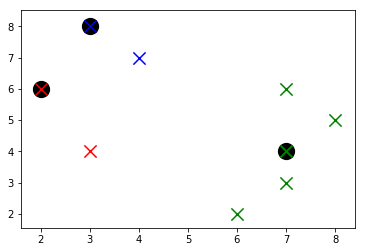

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm_notebook as tqdm



# data = pd.read_excel("Absenteeism_at_work.xls")

# for col in data.columns.values:
#     if col !="Reason for absence" and col != "Height":
#         print(col)
#         data = data.drop(col,axis = 1)
# std = data.std()
# mean = data.mean()
# print(std ,"\n", mean)

# data = (data - mean)/std


data = pd.read_csv("k_means.csv")
# data = shuffle(data)
data.head()

class K_Medoids:
    def __init__(self, k=3, tol=0.000000000001, max_iter=5):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def get_medoid(self, data):
        data = np.array(data)
        distances = np.zeros([data.shape[0],data.shape[0]])
        for i in range(data.shape[0]):
            for j in range(i):
                distances[i][j] = np.linalg.norm(data[i] - data[j])
                distances[j][i] = distances[i][j]
        total_distances = np.sum(distances, axis=0)
        index = total_distances.argmin()
#         print("lol",distances)
#         print(data)
        return data[index]

    def fit(self,data):
        self.medoids = {}
        for i in range(self.k):
            self.medoids[i] = data[i]
        for i in tqdm(range(self.max_iter)):
            print(i,"initial : ", self.medoids)
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.medoids[medoid]) for medoid in self.medoids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            print("classification",self.classifications)
            print()
            prev_medoids = dict(self.medoids)
            for classification in self.classifications:
#                 self.medoids[classification] = np.average(self.classifications[classification],axis=0)
                self.medoids[classification] = self.get_medoid(self.classifications[classification])
#             optimized = True
#             for c in self.medoids:
#                 original_medoid = prev_medoids[c]
#                 current_medoid = self.medoids[c]
#                 if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
#                     optimized = False
# #             if optimized:
#                 break
    def predict(self,data):
        distances = [np.linalg.norm(data-self.medoids[medoid]) for medoid in self.medoids]
        classification = distances.index(min(distances))
        return classification

X = np.array(data)
print(X.shape)
clf = K_Medoids()
clf.fit(X)
print(clf.medoids)

colors = ['r','g','b','c','k','o','y']    
for medoid in clf.medoids:
    plt.scatter(clf.medoids[medoid][0], clf.medoids[medoid][1],
                marker="o", color="k", s=150, linewidths=5)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.show()